# Model30

In [1]:
!ln -s ../data/ ./
!ln -s ../out/ ./

In [2]:
!pip install tabulate

    100% |████████████████████████████████| 51kB 2.1MB/s 
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /content/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
Successfully built tabulate


In [3]:
import os
import keras
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


# Load data for train 

In [4]:
train = pd.read_csv('data/Train_data/dataset_rev4_train.csv')
#buffer datetime
buffer_datetime_train = train.datetime
#remove object
train = train.select_dtypes(exclude=['object'])
#replace misssing value
train.fillna(0,inplace=True)

# Load data for test

In [5]:
test = pd.read_csv('data/test_data/dataset_rev4_test.csv')
#buffer datetime
buffer_datetime_test = test.datetime
#remove object
test = test.select_dtypes(exclude=['object'])
#replace misssing value
test.fillna(0,inplace=True)

In [6]:
print('dimension of train:', train.shape)
print('dimension of test:', test.shape)

dimension of train: (131586, 6)
dimension of test: (16147, 5)


In [7]:
print("features:",list(train.columns))

features: ['I', 'T', 'UV', 'WS', 'RH', 'P']


# Remove outlier

In [8]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 13159
Number of rows without outliers: 118427


# Normalize

In [9]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('P')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)

mat_new = np.matrix(train.drop('P',axis = 1))
mat_y = np.array(train.P).reshape((118427,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

# Create training_set and prediction_set

In [10]:
# List of features
COLUMNS = col_train #column train (x train)
FEATURES = col_train_bis  #column train-label (x test)
LABEL = "P"

# Columns
feature_cols = FEATURES #(x test)

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS] #column train (x train)
prediction_set = train.P # column P

In [11]:
print(type(training_set))
print(type(prediction_set))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Create x_train and Test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)

In [13]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79346, 5)
(39081, 5)
(79346,)
(39081,)


# Create training_set

In [15]:
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_sub = training_set[col_train]

# Create testing_set

In [16]:
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)

In [17]:
training_set.head(1)

,I,T,UV,WS,RH,P
108496,0.034862,0.452675,0.019608,0.279006,0.619369,0.016393


In [18]:
data_aux = training_set

# Correlation Matrix

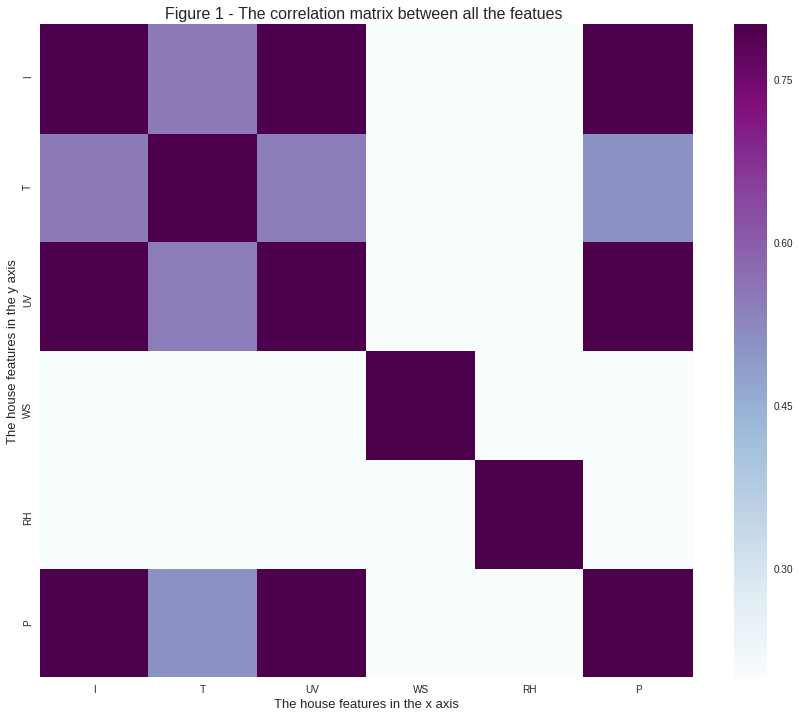

In [19]:
# Correlation Matrix all features
correlation_matrice = data_aux.corr()
f, ax = plt.subplots( figsize=(15, 12))
sns.heatmap(correlation_matrice,vmin=0.2, vmax=0.8, square= True, cmap= 'BuPu')
plt.xlabel('The house features in the x axis',fontsize= 13)
plt.ylabel('The house features in the y axis',fontsize= 13)
plt.title('Figure 1 - The correlation matrix between all the featues ', fontsize= 16);

# Scatter plot of the most correlated features with Solar Power (P)

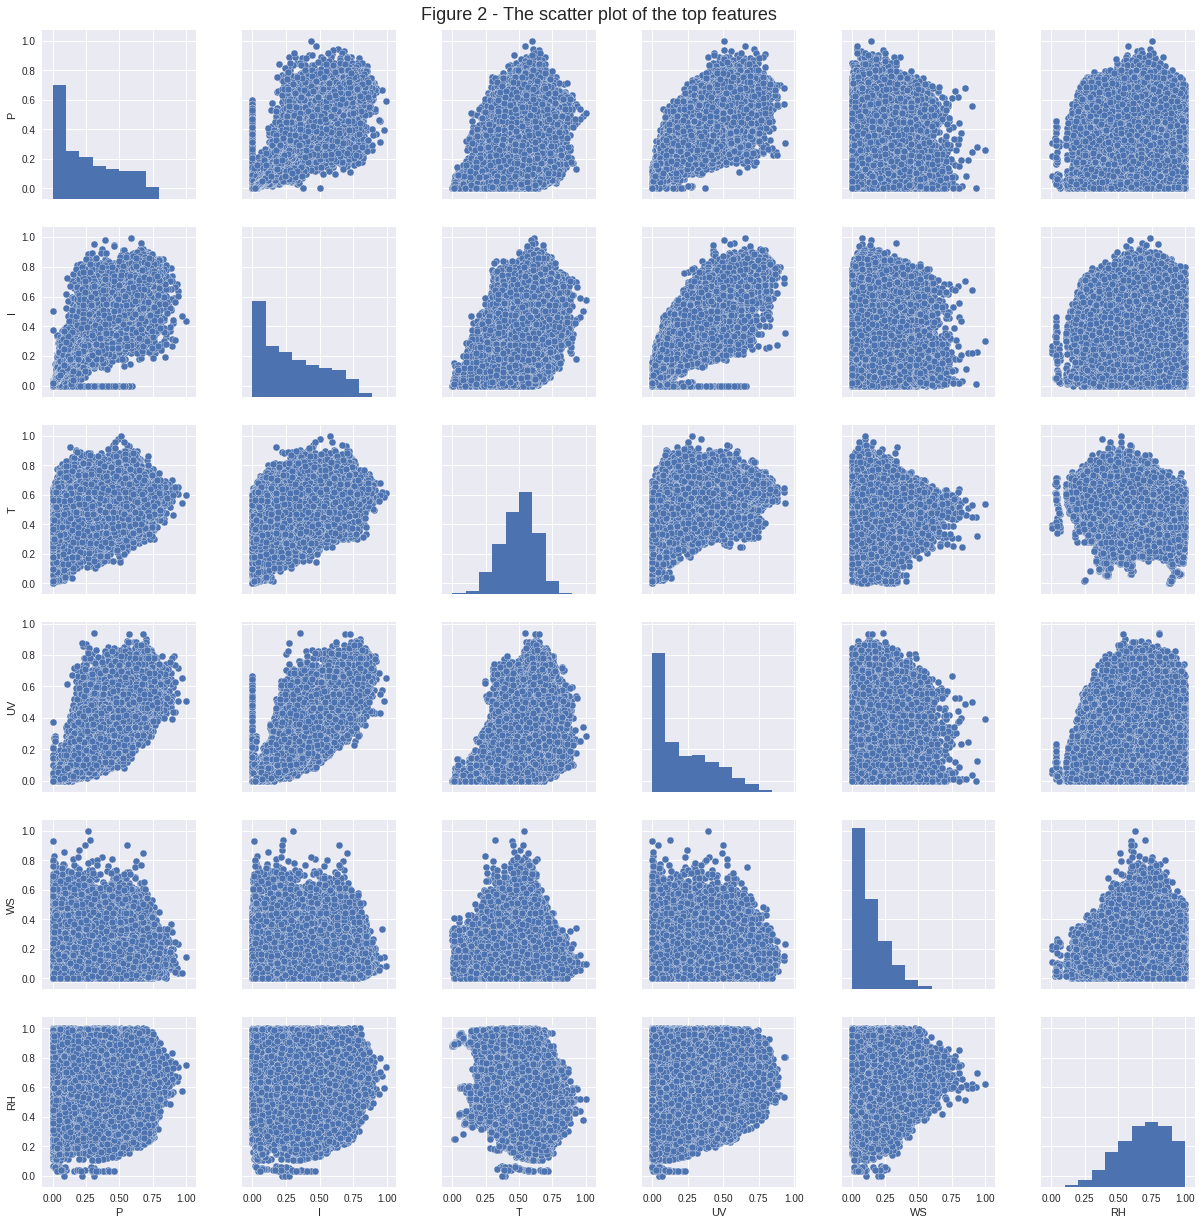

In [20]:
#Scatter plot of thr most important features
cols = ['P', 'I', 'T', 'UV', 'WS', 'RH']
sns.pairplot(data_aux[cols], size = 2.8)
plt.suptitle('Figure 2 - The scatter plot of the top features ',x=0.5, y=1.01, verticalalignment='top', fontsize= 18)
plt.tight_layout()
plt.show();

# Regplot of I/P

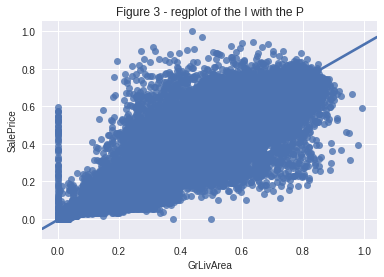

In [21]:
ax = sns.regplot(x=data_aux['I'], y=data_aux['P'])
plt.ylabel('SalePrice', fontsize= 10)
plt.xlabel('GrLivArea', fontsize= 10)
plt.title('Figure 3 - regplot of the I with the P', fontsize= 12)
plt.show();

# Removing the outliers
- We sort the values by I and select the two lager values, and we locate the index number 
- to use it in order to drop corresponding rows.

In [22]:
#g_out = data_aux.sort_values(by="I", ascending = False).head(2)
#g_out
#data_aux.drop([523,1298], inplace = True)
#data_aux.reset_index(inplace=True)

# Regplot of T/P

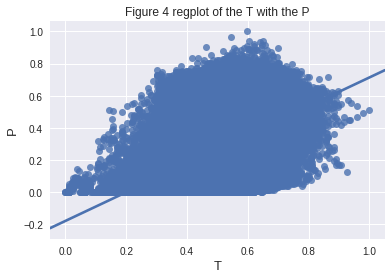

In [23]:
ax = sns.regplot(x=data_aux['T'], y=data_aux['P'])
plt.ylabel('P', fontsize= 13)
plt.xlabel('T', fontsize= 13)
plt.title('Figure 4 regplot of the T with the P', fontsize= 12);
plt.show()

# Missing values

In [24]:
print("Shape of training set: ", training_set.shape)
print("Missing values before remove NA: ")
print(data_aux.columns[data_aux.isnull().any()])

Shape of training set:  (79346, 6)
Missing values before remove NA: 
Index([], dtype='object')


In [25]:
x_train = training_set.drop('P',axis=1)
y_train = training_set['P']

# Create Model

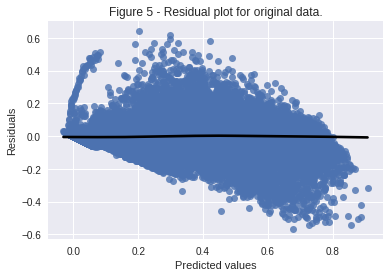

Mean square error:  0.004103599217162011


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm

#scaler = preprocessing.StandardScaler()
#x_train_s = scaler.fit_transform(x_train)   

linear1 = LinearRegression()
linear1.fit(x_train, y_train)
pred = linear1.predict(x_train)
ax = sns.regplot(x=pred,y=y_train-pred,lowess=True,line_kws={"color":"black"})
ax.set_title('Figure 5 - Residual plot for original data.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show();

print("Mean square error: ",sum(np.power((y_train-pred),2))/x_train.shape[0])

#results = sm.OLS(y_train,x_train_s).fit()
#print(results.summary())

# Feature selection

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

#Tree-based feature selection
y_train = (training_set['P'])
x_train = (training_set.drop('P',axis=1))

#clf = ExtraTreesRegressor(random_state=0,n_estimators=1400)
clf = RandomForestRegressor(n_estimators=1400, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)

clf = clf.fit(x_train,y_train)

#Organinzing the features selected for visualization
pd.set_option('display.max_columns', None)#to print all the columns of a data frame
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(data.index[0], ascending=False).T
print("Ten most important features selected with tree-based selection: \n")
print(tabulate(data.iloc[:,0:5],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,6:11],headers='keys', tablefmt='psql'))

#Select the features based on the threshold
model = SelectFromModel(clf, prefit=True,threshold=1e-3)
#Reduce data to the selected features.
aux = model.transform(x_train)

print("\n New shape for train after tree-based feature selection: {}".format(aux.shape))
data_train_less_features_aux = pd.DataFrame(aux)
data_train_less_features_aux.columns = [data.columns[i] for i in range(0,aux.shape[1]) ]
print("\n Features selected :")
print(data_train_less_features_aux.columns)
data_train_less_features = pd.concat([data_train_less_features_aux,pd.DataFrame(y_train)],axis=1)

print("\n End of the process of selecting best features. \n")

Ten most important features selected with tree-based selection: 

+----+----------+-----------+-----------+----------+-----------+
|    |        I |        UV |        RH |        T |        WS |
|----+----------+-----------+-----------+----------+-----------|
|  0 | 0.932737 | 0.0204715 | 0.0190234 | 0.015717 | 0.0120515 |
+----+----------+-----------+-----------+----------+-----------+
+---+
| 0 |
+---+

 New shape for train after tree-based feature selection: (79346, 5)

 Features selected :
Index(['I', 'UV', 'RH', 'T', 'WS'], dtype='object')

 End of the process of selecting best features. 



# Regression Models

In [28]:
#Some usefull packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


#Python dictionary to collect the results
RMSE_results = {
    
    'LinearRegression':0.0,
    'Lasso':0.0,
    'Ridge':0.0,
    'ElasticNet':0.0,
    'SVM':0.0,
    'NN':0.0,    
    'RF':0.0
    
}

In [29]:
print(type(data_train_less_features))
print(type(data_train_less_features))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing

print("Linear Regression \n")

#Cross validation
classifierLinearRegression = LinearRegression(fit_intercept=True, normalize=False,
                                              copy_X=True, n_jobs=1)   
cv_y = []
cv_pred = []
pred = []
    
classifierLinearRegression = classifierLinearRegression.fit(x_train, y_train)
pred = classifierLinearRegression.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['LinearRegression'] = score

Linear Regression 


 Average RMSE: 0.06436283178665989


## Ridge

In [31]:
print("Ridge \n\n")

classifier = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, 
                     scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

cv_y = []
cv_pred = []
pred = []

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Ridge'] = score

Ridge 



 Average RMSE: 0.06436288252590294


## Lasso

In [32]:
print("Lasso \n\n")

classifier = LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
                     normalize=False, precompute='auto', max_iter=1000, tol=0.0001, 
                     copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False,
                     random_state=None, selection='cyclic')  
cv_y = []
cv_pred = []
pred = []

        
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Lasso'] = score

Lasso 



 Average RMSE: 0.06435950980794239


## Elastic Net

In [33]:
print("Elastic Net \n\n")

classifier = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None,
                          fit_intercept=True, normalize=False, precompute='auto', 
                          max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, 
                          n_jobs=1, positive=False, random_state=None, selection='cyclic')  
cv_y = []
cv_pred = []
pred = []
  
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        

cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['ElasticNet'] = score

Elastic Net 



 Average RMSE: 0.06436352132711688


Text(0.5,0,'Models')

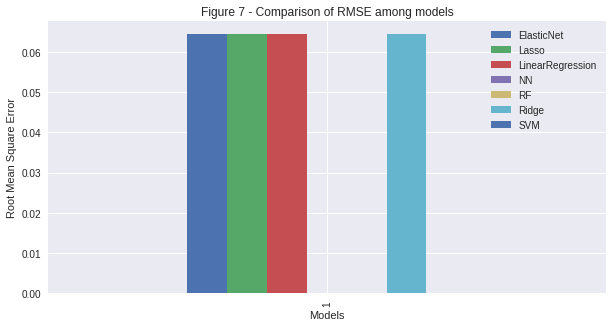

In [34]:
fig_1 = pd.DataFrame(RMSE_results, index=(1,) )
ax = fig_1.plot(kind='bar',figsize=(10,5), title="Figure 7 - Comparison of RMSE among models")
ax.set_ylabel('Root Mean Square Error')
ax.set_xlabel('Models')

In [35]:
from sklearn.svm import SVR
print("SVM")

classifierSVR = SVR(kernel='linear', degree=3, gamma='auto', coef0=0.0, tol=0.001,
                    C=1.0, epsilon=0.1, shrinking=True, cache_size=200,
                    verbose=False, max_iter=-1)  
cv_y = []
cv_pred = []
pred = []
           
classifierSVR = classifierSVR.fit(x_train, y_train)
pred = classifierSVR.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['SVM'] = score

SVM

 Average RMSE: 0.07325788186229287


In [1]:
from sklearn.neural_network import MLPRegressor

print("\nNeural Network")


classifier = MLPRegressor( hidden_layer_sizes=(80,50,20), activation='relu',solver='adam', 
                          alpha=1e-3, batch_size='auto', learning_rate='constant', 
                          learning_rate_init=0.001, power_t=0.5, max_iter=200, 
                          shuffle=True, random_state=7, tol=0.0001, 
                          verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                          early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                          beta_2=0.999, epsilon=1e-08)  
cv_y = []
cv_pred = []
pred = []
    
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        

cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['NN'] = score


Neural Network


NameError: name 'x_train' is not defined

In [ ]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

print("\n Random Forests ")
print("\n Full Features ")

classifierAllFeatures = RandomForestRegressor(n_estimators=500, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)

cv_y = []
cv_pred = []
pred = []
          
classifierAllFeatures.fit(x_train, y_train)
pred = classifierAllFeatures.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE using all features: {}".format(score))    


###########Less features
print("\n Less features ")
   
cv_y = []
cv_pred = []
pred = []

classifierRF_lessFeatures = RandomForestRegressor(n_estimators=500, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)

classifierRF_lessFeatures.fit(x_train, y_train)
pred = classifierRF_lessFeatures.predict(x_test)
cv_y.append(y_test)
cv_pred.append(pred)        
    
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE less features: {}".format(score))    

RMSE_results['RF'] = score